# Projeto Kmeans


Este projeto consiste na execução e validação do algoritmo de aprendizado não supervisionado para
agrupamento (K-means) estudado na disciplina de Inteligência Artificial, ministrada pela Prof.ª Dr.ª Heloisa de Arruda Camargo.  



________________



______________

## Conjunto de Dados

Nós usamos nas duas etapas do projeto um conjunto de dados chamado diagnosis.data com 8 variáveis, encontrado no repositório UCI: https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations


* Temperature of patient {36C - 42C}
* Ocurrence of nausea  {yes - no}
* Lumbar pain  {yes - no}
* Lrine pushing  {yes - no}
* Micturition pains  {yes - no}
* Burning of urethra  {yes - no}
* Inflammation of urinary bladder  {yes - no}
* Nephritis of renal pelvis origin  {yes - no}

Os atributos representam sintomas de pacientes que resultam em dois diagnósticos, Inflammation of urinary bladder e Nephritis of renal pelvis origin,resolvemos usar o diagnóstico  'Nephritis of renal pelvis origin' como atributo-meta.

Após isso executamos 2 etapas:
> Parte 1 - Validação com índice externo (Adusted Rand Index)

> Parte 2 - Determinação do melhor número de grupos usando a soma quadrática das distâncias com índice interno (Método do "cotovelo")


## Importação das bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans


##  Parte 1 -  Validação com índice externo (Adusted Rand Index)

**Lendo o conjunto de dados diagnosis.data com a função read.csv() e mostrando as 5 primeiras linhas com .head()**


In [ ]:
df = pd.read_csv("diagnosis.data",
                 names=['Temperature', 'Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains','Burning of urethra', 'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'],
                 encoding='utf-16')
df.head()


,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


**Criando outra tabela de dados retirando as colunas refente as classes**

In [ ]:
new_df = df.drop(['Nephritis of renal pelvis origin', 'Inflammation of urinary bladder'], axis=1)

new_df

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
0,35.5,no,yes,no,no,no
1,35.9,no,no,yes,yes,yes
2,35.9,no,yes,no,no,no
3,36.0,no,no,yes,yes,yes
4,36.0,no,yes,no,no,no
...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes
116,41.5,no,no,no,no,no
117,41.5,yes,yes,no,yes,no
118,41.5,no,yes,yes,no,yes


**Transformando atributos nominais**

In [ ]:
# separando em duas listas pra poder transformar os atributos nominais
categorical_features= ['Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains','Burning of urethra']
continuous_features= ['Temperature']

In [ ]:
#transformando os atributos nominais em binario
for col in categorical_features:
  dummies= pd.get_dummies(new_df[col], prefix=col)
  new_df = pd.concat([new_df, dummies], axis=1)
  new_df.drop(col, axis=1, inplace=True)
new_df.head()

,Temperature,Nausea_no,Nausea_yes,Lumbar pain_no,Lumbar pain_yes,Urine pushing_no,Urine pushing_yes,Micturition pains_no,Micturition pains_yes,Burning of urethra_no,Burning of urethra_yes
0,35.5,1,0,0,1,1,0,1,0,1,0
1,35.9,1,0,1,0,0,1,0,1,0,1
2,35.9,1,0,0,1,1,0,1,0,1,0
3,36.0,1,0,1,0,0,1,0,1,0,1
4,36.0,1,0,0,1,1,0,1,0,1,0


**Normalizando os atributos contínuos**

In [ ]:
mms = MinMaxScaler()
mms.fit(new_df)
data_transformed = mms.transform(new_df)

**Aplicação do algoritmo k-means no conjunto de dados**

In [ ]:
km = KMeans(n_clusters=2,random_state=0) 
km.fit(data_transformed)
km.inertia_

203.1569641278262

**Avaliação com índice de validação externo Adusted Rand Index (ARI)**

In [ ]:
adjusted_rand_score(df['Nephritis of renal pelvis origin'], km.labels_)

0.4146539397920934

## Parte 2 - Determinação do melhor número de grupos usando a soma quadrática das distâncias com índice interno (Método do "cotovelo")

**Lendo o conjunto de dados diagnosis.data com a função read.csv() e mostrando as 5 primeiras linhas com .head()**

In [ ]:
#usamos o mesmo arquivo da parte 1

df = pd.read_csv("diagnosis.data",
                 names=['Temperature', 'Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains','Burning of urethra', 'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'],
                 encoding='utf-16')
df.head() 


,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


**Criando outra tabela de dados retirando as colunas refente as classes**

In [ ]:
new_df = df.drop(['Nephritis of renal pelvis origin', 'Inflammation of urinary bladder'], axis=1)
new_df

,Temperature,Nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
0,35.5,no,yes,no,no,no
1,35.9,no,no,yes,yes,yes
2,35.9,no,yes,no,no,no
3,36.0,no,no,yes,yes,yes
4,36.0,no,yes,no,no,no
...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes
116,41.5,no,no,no,no,no
117,41.5,yes,yes,no,yes,no
118,41.5,no,yes,yes,no,yes


**Transformando atributos nominais**

In [ ]:
# separando em duas listas pra poder transformar os atributos nominais
categorical_features= ['Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains','Burning of urethra']
continuous_features= ['Temperature']

In [ ]:
#transformando os atributos nominais em binario
for col in categorical_features:
  dummies= pd.get_dummies(new_df[col], prefix=col)
  new_df = pd.concat([new_df, dummies], axis=1)
  new_df.drop(col, axis=1, inplace=True)
new_df.head()

,Temperature,Nausea_no,Nausea_yes,Lumbar pain_no,Lumbar pain_yes,Urine pushing_no,Urine pushing_yes,Micturition pains_no,Micturition pains_yes,Burning of urethra_no,Burning of urethra_yes
0,35.5,1,0,0,1,1,0,1,0,1,0
1,35.9,1,0,1,0,0,1,0,1,0,1
2,35.9,1,0,0,1,1,0,1,0,1,0
3,36.0,1,0,1,0,0,1,0,1,0,1
4,36.0,1,0,0,1,1,0,1,0,1,0


In [ ]:
#escalar os atributos contínuos

mms = MinMaxScaler()
mms.fit(new_df)
data_transformed = mms.transform(new_df)

**Definindo um intervalo de valores para número de grupos de (2,15)**

In [ ]:
K = range(2,15)

**Aplicando o algoritmo k-means e coletado o valor do índice soma quadrática das distâncias usando .inertia_**



In [ ]:
Sum_of_squared_distances = []

for n in K:
  km = KMeans(n_clusters=n)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

**Plotando o gráfico dos índices encontrados para cada número de grupos e determinando qual é o melhor
de acordo com o método do cotovelo**

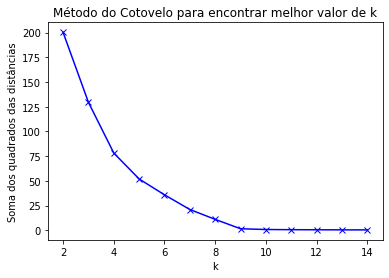

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

**Portando o melhor valor de k é 8**


